In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


In [39]:
def convert_seconds_to_days(row):
    second = row.second  # Ambil nilai detik dari timeStamps
    
    # Tentukan bulan dan tahun awal
    year = 1957
    month = 5
    
    # Hari ditentukan dari detik, misalnya detik ke-10 = hari ke-15, dst.
    new_day = second + 5

    # Jika new_day melebihi jumlah hari di bulan, kita perlu menyesuaikan bulan dan tahun
    while True:
        days_in_month = calendar.monthrange(year, month)[1]  # Mendapatkan jumlah hari dalam bulan tersebut
        
        if new_day <= days_in_month:
            break  # Jika new_day masih dalam batas, tidak perlu ubah bulan atau tahun
        else:
            new_day -= days_in_month  # Kurangi hari dengan jumlah hari dalam bulan
            month += 1  # Pindah ke bulan berikutnya
            
            if month > 12:
                month = 1  # Reset ke Januari jika sudah melebihi Desember
                year += 1  # Tambahkan tahun jika bulan lebih dari 12
    
    # Kembalikan hanya tahun, bulan, dan hari
    return pd.Timestamp(year=year, month=month, day=new_day).strftime('%Y-%m-%d')


In [152]:
from datetime import datetime
import random
def format_datetime(date_str):
    # Parsing string ke objek datetime
    dt_obj = datetime.fromisoformat(date_str)
    
    # Format objek datetime ke format yang diinginkan
    formatted_date = dt_obj.strftime('%Y-%m-%d %H:%M:%S')
    
    return formatted_date

def convert_float_to_int(value):
    return int(value)

# def convert_seconds_to_months(row):
#     second = row.second  # Ambil nilai detik dari timeStamps
    
#     # Tentukan bulan dan tahun awal
#     year = 1957
#     month = 1  # Awal bulan adalah Januari
    
#     # Gunakan detik untuk menentukan bulan. Misalnya, detik ke-10 jadi bulan Oktober (bulan ke-10)
#     new_month = second + 1  # Detik ke-10 jadi bulan 11 (Oktober)
    
#     # Jika new_month melebihi 12, sesuaikan bulan dan tahun
#     while new_month > 12:
#         new_month -= 12  # Kurangi 12 untuk mendapatkan bulan valid
#         year += 1  # Tambahkan tahun jika bulan melebihi 12
    
#     # Kembalikan hanya tahun dan bulan
#     return pd.Timestamp(year=year, month=new_month, day=1).strftime('%Y-%m')


# def convert_seconds_to_months(row):
#     second = row.second  # Ambil nilai detik dari timeStamps
    
#     # Tentukan bulan dan tahun awal
#     year = 1957
#     month = 1  # Awal bulan adalah Januari
    
#     # Gunakan detik untuk menentukan bulan. Misalnya, detik ke-10 jadi bulan Oktober (bulan ke-10)
#     new_month = second + 1  # Detik ke-10 jadi bulan 11 (Oktober)
    
#     # Jika new_month melebihi 12, sesuaikan bulan dan tahun
#     while new_month > 12:
#         new_month -= 12  # Kurangi 12 untuk mendapatkan bulan valid
#         year += 1  # Tambahkan tahun jika bulan melebihi 12
    
#     # Dapatkan jumlah hari dalam bulan yang ditentukan
#     days_in_month = calendar.monthrange(year, new_month)[1]  # Jumlah hari dalam bulan
    
#     # Pilih hari secara acak dalam bulan tersebut
#     random_day = random.randint(1, days_in_month)
    
#     # Kembalikan tahun, bulan, dan hari acak
#     return pd.Timestamp(year=year, month=new_month, day=random_day).strftime('%Y-%m-%d')

def convert_index_to_months(idx):
    # Tentukan bulan dan tahun awal
    year = 1957
    start_month = 1  # Mulai dari Januari
    
    # Tentukan bulan berdasarkan index, dengan rotasi jika melebihi 12 bulan
    new_month = (start_month + idx) % 12
    if new_month == 0:
        new_month = 12  # Atur bulan 12 jika hasil mod adalah 0
    
    # Tambahkan tahun jika index melebihi 12 bulan
    year += (start_month + idx - 1) // 12
    
    # Dapatkan jumlah hari dalam bulan yang ditentukan
    days_in_month = calendar.monthrange(year, new_month)[1]
    
    # Pilih hari secara acak dalam bulan tersebut
    random_day = random.randint(1, days_in_month)
    
    # Kembalikan tahun, bulan, dan hari acak
    return pd.Timestamp(year=year, month=new_month, day=random_day).strftime('%Y-%m-%d')

In [204]:
df = pd.read_csv("./dataset_fixeds.csv")
# df['timeStamps'] = pd.to_datetime(df['timeStamps'], utc=True)
df['timeStamps'] = df['timeStamps'].apply(format_datetime)
df['timeStamps'] = pd.to_datetime(df['timeStamps'],utc=True)

df['Month'] = df.index.map(convert_index_to_months)
# df['estimatedBandwidths'] = df['estimatedBandwidths'].apply(convert_float_to_int)
df_chg= df.set_index(['Month'], drop=True)
# split_date = pd.Timestamp('1961-06-27')

# df1 = df['estimatedBandwidths'] 
# train = df1.loc[:split_date]
# test = df1.loc[split_date:]
# df
# split_date = pd.Timestamp('1957-10-12')
# df1 = df['estimatedBandwidths'] 
# # train = df1.loc[:split_date]
# df1
# test = df1.loc[split_date:]
df_chg

,timeStamps,bufferSizes,bufferingStates,bufferingEvents,newBitrates,oldBitrates,resolutions,streamBandwidths,estimatedBandwidths
Month,,,,,,,,,
1957-01-16,2024-09-16 06:11:10+00:00,1.0,1,0.047000,14998609,5019963,3840p,1.4,3.1
1957-02-19,2024-09-16 06:11:11+00:00,1.0,0,0.047000,14998609,5019963,3840p,1.4,7.1
1957-03-18,2024-09-16 06:11:12+00:00,1.0,0,0.047000,14998609,5019963,3840p,1.4,7.1
1957-04-21,2024-09-16 06:11:13+00:00,1.0,0,0.047000,14998609,5019963,3840p,1.4,7.1
1957-05-10,2024-09-16 06:11:14+00:00,1.0,0,0.047000,14998609,5019963,3840p,1.4,7.1
...,...,...,...,...,...,...,...,...,...
2005-08-16,2024-09-16 06:26:48+00:00,1.0,0,309.145001,1321829,826869,640p,1.2,1.7
2005-09-08,2024-09-16 06:26:49+00:00,0.9,0,309.145001,1321829,826869,640p,1.2,1.7
2005-10-31,2024-09-16 06:26:51+00:00,1.0,1,310.029001,1321829,826869,640p,1.2,1.9


In [208]:
split_index = int(len(y) * 0.7)
y= df_chg["estimatedBandwidths"]
# Split data ke training dan testing set
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# Print ukuran data train dan test untuk memverifikasi
print(f'Training Data Size: {len(y_train)}')
print(f'Testing Data Size: {len(y_test)}')


Training Data Size: 411
Testing Data Size: 177


In [209]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Latih model SARIMA
model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit()

# Prediksi dengan data test
predictions = sarima_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Cetak hasil prediksi

d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\cursor_code\python\Lstm\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an

In [210]:
predictions


411    4.812189
412    4.980446
413    5.065146
414    5.257387
415    5.426869
         ...   
583    5.728399
584    5.819116
585    5.780131
586    5.665252
587    5.421472
Name: predicted_mean, Length: 177, dtype: float64

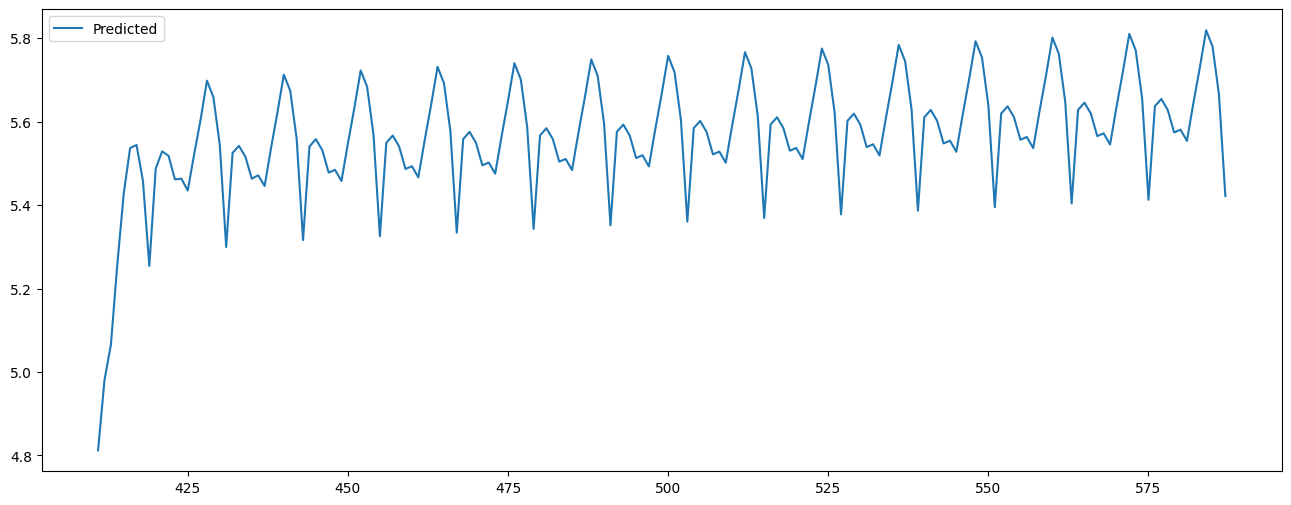

In [211]:
plt.figure(figsize=(16, 6))
# plt.plot(train , label='Predicted')
plt.plot(predictions , label='Predicted')
plt.legend()
plt.show()

In [147]:
import pandas as pd
import calendar
import random

# Contoh DataFrame dengan timeStamps
data = {'timeStamps': ['2024-09-16 06:11:10.683000+00:00', 
                       '2024-09-16 06:11:11.824000+00:00', 
                       '2024-09-16 06:11:12.000000+00:00']*100}  # Mengulang beberapa timeStamps untuk tes
df = pd.DataFrame(data)

# Konversi kolom timeStamps menjadi datetime
df['timeStamps'] = pd.to_datetime(df['timeStamps'], utc=True)

# Fungsi untuk mengubah index menjadi bulan secara berurutan, dan menambahkan hari secara acak
def convert_index_to_months(idx):
    # Tentukan bulan dan tahun awal
    year = 1957
    start_month = 1  # Mulai dari Januari
    
    # Tentukan bulan berdasarkan index, dengan rotasi jika melebihi 12 bulan
    new_month = (start_month + idx) % 12
    if new_month == 0:
        new_month = 12  # Atur bulan 12 jika hasil mod adalah 0
    
    # Tambahkan tahun jika index melebihi 12 bulan
    year += (start_month + idx - 1) // 12
    
    # Dapatkan jumlah hari dalam bulan yang ditentukan
    days_in_month = calendar.monthrange(year, new_month)[1]
    
    # Pilih hari secara acak dalam bulan tersebut
    random_day = random.randint(1, days_in_month)
    
    # Kembalikan tahun, bulan, dan hari acak
    return pd.Timestamp(year=year, month=new_month, day=random_day).strftime('%Y-%m-%d')

# Terapkan fungsi ke index DataFrame, bukan ke nilai timeStamps
df['converted_time'] = df.index.map(convert_index_to_months)

# Tampilkan DataFrame hasil
# print(df[['timeStamps', 'converted_time']])


,timeStamps,converted_time
0,2024-09-16 06:11:10.683000+00:00,1957-01-23
1,2024-09-16 06:11:11.824000+00:00,1957-02-09
2,2024-09-16 06:11:12+00:00,1957-03-02
3,2024-09-16 06:11:10.683000+00:00,1957-04-01
4,2024-09-16 06:11:11.824000+00:00,1957-05-02
...,...,...
295,2024-09-16 06:11:11.824000+00:00,1981-08-20
296,2024-09-16 06:11:12+00:00,1981-09-08
297,2024-09-16 06:11:10.683000+00:00,1981-10-13
298,2024-09-16 06:11:11.824000+00:00,1981-11-19
